# Google Play Store Data Analysis: Influence of Sentiment Polarity on App Ratings
**TXC Group 15**<br>
Konstantin Gottschalk - 67864 <br>
Sofia da Costa Peres Tavares Delgado - 65142<br>
Julian Andres Villacis Yagual - 67650<br>

## Table of Contents 
* [1 Exec Summary](#1-exec-summary)
* [2 Introduction](#2-introduction)
    * [2.1 About the Data](#21-about-the-data)
* [3 Setup](#3-setup) -> leave? or under expl. data analysis
    * [3.1 Import Libraries and Data](#31-import-libraries-and-data)
    * [3.2 Data Preparation](#32-data-preparation)
    * [3.3 Data Cleaning](#33-data-cleaning)
        * [3.3.1 Drop Unnecessary Columns](#331-drop-unnecessary-columns)
        * [3.3.2 Missing Values](#332-missing-values)
        * [3.3.3 Duplicates](#333-duplicates)
        * [3.3.4 Calculate Average Sentiment Polarity](#334-calculate-average-sentiment-polarity)
* [4 Exploratory Data Analysis](#4-exploratory-data-analysis)
* [5 Hypotheses-> Methods](#5-hypotheses)
    * [5.1 Hypothesi -> Method 1? ](#51-hypothesis-1-apps-with-higher-average-sentiment-polarity-have-higher-ratings-than-apps-with-low-sentiment-polarity)
        * [5.1.1 Two Sample One-Sided T-Test](#511-two-sample-one-sided-t-test)
        * [5.1.2 Interpretation of the Results](#512-interpretation-of-the-results)
    * [5.2 Hypothesis -> -> Method 2?](#52-hypothesis-2-higher-sentiment-polarity-has-stronger-influence-on-the-average-rating-in-some-categories)
        * [5.2.1 Linear Regression](#521-linear-regression)
        * [5.2.2 Interpretation of the Results](#522-interpretation-of-the-results)
        * [5.2.3 Making Predictions](#523-making-predictions)
        * [5.2.4 Checking Model Assumptions](#524-checking-model-assumptions)
        + Reflection on use of AI
* [6 Conclusion](#6-conclusion)
    * [6.1 Limitations](#61-limitations)
    * [6.2 Suggestions for Improvement](#62-suggestions-for-improvement)



## 1 Exec Summary 
In this notebook, a data set from Google Play Store apps will be thoroughly explored and analysed. The aim of this project is to explore the relationship between sentiment polarity and app ratings in the Google Play Store, with a focus on how this relationship varies across major app categories. Through a structured research approach, two hypotheses will be tested: (H1) Apps with high sentiment polarity have higher average ratings than those with low sentiment polarity, and (H2) The influence of sentiment polarity on app ratings is stronger in specific app categories. The analysis includes exploratory data analysis, hypothesis testing, and the use of two research models to draw insights and conclusions about the influence of user sentiment on app success across different categories.

Overall, the project demonstrates that sentiment polarity plays a significant role in app ratings, with variations in its influence across different app categories. For the first hypothesis, a t-test shows that apps with higher sentiment polarity generally have higher average ratings. For the second hypothesis, linear regression shows that sentiment polarity has a stronger effect in categories like medical, health & fitness, and productivity, with non-linear relationships indicating diminishing returns at extreme polarity levels. The findings also highlight the complex, non-linear nature of this relationship, suggesting further opportunities for exploration and refinement of the models used.


## 2 Introduction
### 2.1 About the Data 

For this project, two data sets are used which complement each other. The first is comprised of a collection of apps from the Google Play Store, featuring key attributes such as app categories and rating, as well as user reviews, pricing, etc. <br>
The second contains the respective user reviews of the apps. It includes the review text itself as well as attributes to measure the sentiment. Sentiment polarity, for instance, measures the tone of the user feedback, ranging from -1 (most negative) to 1 (most positive). The average app rating, on a scale of 1 to 5, serves as the dependent variable for this study, while sentiment polarity is the primary independent variable of interest.

#### Play Story Data Set
**App** : The name of the app<br>
**Category**: The category of the app<br>
**Rating**: The rating of the app in the Play Store<br>
**Reviews**: The number of reviews of the app<br>
**Size**: The size of the app<br>
**Install**: The number of installs of the app<br>
**Type**: The type of the app (Free/Paid)<br>
**Price**: The price of the app (0 if it is Free)<br>
**Content Rating**: The appropiate target audience of the app<br>
**Genres**: The genre of the app<br>
**Last Updated**: The date when the app was last updated<br>
**Current Ver**: The current version of the app<br>
**Android Ver**: The minimum Android version required to run the app<br>
##### Play Store User Reviews Data Set 
**App**: The name of the app <br>
**Translated Review**: The text of the review<br>
**Sentiment**: The sentiment of the Review categorized in Neutral, Positive or Negative<br>
**Sentiment Polarity**: The sentiment polartiy of the review (-1, 1)<br>
**Sentiment Subjectivity**: The subjectivity of the review (0, 1)<br>
*** 
### 2.2 Research Question
The goal of this research is to better understand the question:
#### How does sentiment polarity influence app ratings and how does it differ in major app categories?
To answer this question, we have formulated two hypotheses which will be tested:
*** 
### 2.3 Hypotheses 
#### Hypothesis 1: Apps with high sentiment polarity have higher average ratings than apps with low sentiment polarity
- **Null Hypothesis (H₀):** There is no significant difference in average ratings between apps with high sentiment polarity and apps with low sentiment polarity.
- **Alternative Hypothesis (H₁):** Apps with high sentiment polarity have significantly higher average ratings than apps with low sentiment polarity.


<br>

#### Hypothesis 2: Higher Sentiment Polarity has stronger influence on the average Rating in some Categories 
- **Null Hypothesis (H₀):** The influence of sentiment polarity on ratings does not vary significantly across major app categories.
- **Alternative Hypothesis (H₁):**  The influence of sentiment polarity on ratings is significantly stronger in some major app categories compared to others.


For our data analysis we first conduct an exploratory data analysis to assess the distribution and relationship between key variables. From this analysis, we derived two research methods to test each hypothesis.
To test the first hypothesis, t tests are used to assess whether sentiment polarity is a significant indicator of ratings.
For the second hypothesis, a linear regression is conducted to examine the strength of the correlation across major categories.
***

## 3 Setup

### 3.1 Import Libraries and Data
First we will import all the necessary libraries as well as our data sets. We will also have a first look at the structure of the data to help us understand it.

In [1]:
# Import libraries
# Data
import pandas as pd 
import numpy as np

# Graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Load CSV file 
play_store = pd.read_csv('./googleplaystore.csv')
user_reviews = pd.read_csv('./googleplaystore_user_reviews.csv')

## Provide Data Overview ## 
print("First have a look at the first few rows of our data set and the general structure: \n")
print(play_store.head())
print("\n\nNumber of Rows and Columns: " + str(play_store.shape) + "\n") 
user_reviews.head()
print("Number of Rows and Columns: " + str(user_reviews.shape) + "\n")

print("This shows that the Ratings are already in float. Other numerical columns must still be converted: ")
print(play_store.info())
print(user_reviews.info())


First have a look at the first few rows of our data set and the general structure: 

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0        

### 3.2 Data Preparation
The first step is to prepare our data for further analysis. 
To achieve a processable data set we must ensure that all columns contain values of the same type (e.g. int, float, etc.). Furthermore, we will remove or fix any faulty values. 


In [2]:
# App Column
# Ensure that all values are strings
play_store.App = play_store.App.astype(str)

# Remove -"- from App names 
play_store.App = play_store.App.str.replace('["]', '', regex=True)


# Category Column
# Ensure that all values are strings
play_store.Category = play_store.Category.astype(str)

# Check Occurences in Category column
print(f"All unique Category values:\n{play_store.Category.unique()}\n") # Some data entries have faulty categories

# Create List of wanted Categories
categories = [
    'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
    'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
    'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
    'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL',
    'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS',
    'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS',
    'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'
]

# Delete Data entries with deviating categories
play_store = play_store.drop(play_store.loc[~play_store['Category'].isin(categories)].index, axis=0)

# Reset the index to ensure continuous numbering
play_store = play_store.reset_index(drop=True)


# Rating Column
# Inspect Rating data 
print(f"All unique Rating values: {play_store.Rating.unique()}\n")

# Ensure that all values are numeric and force any invalid ratings to NaN
play_store.Rating = pd.to_numeric(play_store.Rating, errors="coerce")

# Ensure that all ratings are in the valid range (0 to 5)
print(f"Range: {play_store.Rating.min()} - {play_store.Rating.max()}\n")


# Reviews Column
# Inspect Review Data for invalid data
play_store[~play_store.Reviews.str.isnumeric()]

# Ensure that all values are numeric and force any invalid ratings to NaN
play_store.Reviews = play_store.Reviews.astype(int)


# Size Column
# Inspect Size data
print(f"All unique Size values: {play_store.Size.unique()}\n")

# Remove kilo and Mega suffixes 
play_store.Size = play_store.Size.str.replace('M','') 
play_store.Size = play_store.Size.str.replace('k','e-3') # convert kilo to mega
play_store.Size = play_store.Size.str.replace(',','') # remove commas for special cases >1000

# Ensure that all values are float and force any invalid data to NaN
play_store.Size = pd.to_numeric(play_store.Size, errors="coerce")


# Installs Column
# Inspect Size data
print(f"All unique Installs values: {play_store.Installs.unique()}\n")

# Remove commas and plus signs 
play_store.Installs = play_store.Installs.str.replace(',', '').str.replace('+', '')

# Convert cleaned values to numeric
play_store.Installs = play_store.Installs.astype(int)


# Type Column
print(f"All unique Type values {play_store.Type.unique()}\n") # No further processing necessary

# Price Column
# Inspect Price data
print(play_store.Price.unique())

# Remove Dollar Sign
play_store.Price = play_store.Price.str.replace('$', '')

# Convert to float 
play_store.Price = play_store.Price.astype(float)


# Content Rating Column
# Inspect Content Rating Data
print(f"All unique Content Rating values: {play_store["Content Rating"].unique()} \n")
# No further processing necessary


# Genres Column
# Inspect Genres Data
print(f"All unique Genre values: {play_store.Genres.unique()}\n")
# No further processing necessary


# Check data types
print(f"{play_store.info()}\n")
print(f"{user_reviews.info()}\n")

All unique Category values:
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

All unique Rating values: [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]

Range: 1.0 - 5.0

All unique Size values: ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '5

### 3.3 Data Cleaning

#### 3.3.1 Drop Unnecessary Columns
After our preparing the data we now remove all unnecessary columns. This ensures that we can focus on the variables that are relevant for our analysis while also making our data set smaller which speeds up the analysis.

In [3]:
# Drop Reviews column
play_store = play_store.drop(["Reviews"], axis=1)

# Drop Size column
play_store = play_store.drop(["Size"], axis=1)

# Drop Installs column
play_store = play_store.drop(["Installs"], axis=1)

# Drop Type column
play_store = play_store.drop(["Type"], axis=1)

# Drop Price column
play_store = play_store.drop(["Price"], axis=1) 

# Drop Content Rating column
play_store = play_store.drop(["Content Rating"], axis=1)

# Drop Genres column
play_store = play_store.drop(["Genres"], axis=1)

# Drop Last Updated column
play_store = play_store.drop(["Last Updated"], axis=1)

# Drop Current Ver column
play_store = play_store.drop(["Current Ver"], axis=1)

# Drop Android Ver column
play_store = play_store.drop(["Android Ver"], axis=1)

# Drop Translated_Review column
user_reviews = user_reviews.drop(["Translated_Review"], axis=1)

# Drop Sentiment column
user_reviews = user_reviews.drop(["Sentiment"], axis=1)

# Drop Sentiment Subjectivity column
user_reviews = user_reviews.drop(["Sentiment_Subjectivity"], axis=1)

# Check data structure 
print(play_store.head())
print(user_reviews.head())



                                                 App        Category  Rating
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1
1                                Coloring book moana  ART_AND_DESIGN     3.9
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3
                     App  Sentiment_Polarity
0  10 Best Foods for You                1.00
1  10 Best Foods for You                0.25
2  10 Best Foods for You                 NaN
3  10 Best Foods for You                0.40
4  10 Best Foods for You                1.00


#### 3.3.2 Missing Values
In this step we make sure that any rows containing null values are removed from the data set. This is done to have a uniform dataset where we have the same amount of values for each column. 

In [4]:
# Find number of null values for each column of the play_store data frame
null_values_per_column = play_store.isnull().sum()
print(f"{null_values_per_column} \n")

# Find number of null values for each column of the user_reviews data frame
null_values_per_column = user_reviews.isnull().sum()
print(f"{null_values_per_column} \n")


App            0
Category       0
Rating      1474
dtype: int64 

App                       0
Sentiment_Polarity    26863
dtype: int64 



In [5]:
# Drop missing data in play_store data frame
# Delete Data entries with missing values in the Rating column
play_store = play_store.drop(play_store.loc[play_store.Rating.isnull()].index, axis=0)


# Drop missing data in user_reviews data frame
# Delete Data entries with missing values in the Sentiment_Polarity column
user_reviews = user_reviews.drop(user_reviews.loc[user_reviews.Sentiment_Polarity.isnull()].index, axis=0)

# Check null values again
null_values_per_column = play_store.isnull().sum()
print(f"{null_values_per_column} \n")

null_values_per_column = user_reviews.isnull().sum()
print(f"{null_values_per_column} \n")


App         0
Category    0
Rating      0
dtype: int64 

App                   0
Sentiment_Polarity    0
dtype: int64 



#### 3.3.3 Duplicates
Duplicates must also be removed from the dataset as they would bias our analysis. 

In [6]:
# Count number of duplicates in play_store data frame
duplicates = play_store.duplicated()
print(f"Total number of duplicates in the play_store data frame is: {duplicates.sum()}")

# Count number of duplicates in user_reviews data frame
duplicates = user_reviews.duplicated()
print(f"Total number of duplicates in the user_reviews dataframe is: {duplicates.sum()}")

Total number of duplicates in the play_store data frame is: 1077
Total number of duplicates in the user_reviews dataframe is: 15014


In [7]:
# Handle duplicates
play_store.drop_duplicates(inplace=True)
user_reviews.drop_duplicates(inplace=True)

# Count number of duplicates in play_store data frame
duplicates = play_store.duplicated()
print(f"Total number of duplicates in the play_store data frame is: {duplicates.sum()}\n")

# Count number of duplicates in user_reviews data frame
duplicates = user_reviews.duplicated()
print(f"Total number of duplicates in the user_reviews dataframe is: {duplicates.sum()}\n")

# Reset the index to ensure continuous numbering
play_store = play_store.reset_index(drop=True)


Total number of duplicates in the play_store data frame is: 0

Total number of duplicates in the user_reviews dataframe is: 0



#### 3.3.4 Calculate Average Sentiment Polarity
In this final step, the average sentiment polarity is calculated for each app. This is achieved by taking the average from the user reviews data frame and creating a new column in our play store data frame. 

In [8]:
# Create new column in the play_store dataframe and calculate the average sentiment polarity for each app based on the user_reviews data frame 
play_store = play_store.merge(user_reviews.groupby('App')['Sentiment_Polarity'].mean().rename('Avg_Sentiment_Polarity'), on='App', how='left')

# Drop rows with missing values in the Avg_Sentiment_Polarity and Avg Sentiment Subjectivity columns
play_store = play_store.drop(play_store.loc[play_store['Avg_Sentiment_Polarity'].isnull()].index, axis=0)

# Check data
play_store = play_store.reset_index(drop=True)
print(play_store.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     851 non-null    object 
 1   Category                851 non-null    object 
 2   Rating                  851 non-null    float64
 3   Avg_Sentiment_Polarity  851 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.7+ KB
None


We have now achieved a clean dataframe that only contains the columns required for our analysis and can proceed with our exploratory data analysis.

## 4 Exploratory Data Analysis

In [9]:
# Set a color palette
# Let's begin by setting the style for the plots
sns.set_style(style="whitegrid")

# Prepare further data for plotting
# Get the top 5 categories with the most apps
top_10_categories = play_store['Category'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 5 categories
top_10_play_store = play_store[play_store['Category'].isin(top_10_categories)]

# Print Number of Apps per Category
print(f"Number of Apps per Category: \n{top_10_play_store['Category'].value_counts()}")

Number of Apps per Category: 
Category
GAME                  93
FAMILY                82
TOOLS                 48
TRAVEL_AND_LOCAL      42
HEALTH_AND_FITNESS    40
FINANCE               39
PRODUCTIVITY          37
MEDICAL               34
PERSONALIZATION       34
COMMUNICATION         33
Name: count, dtype: int64


We will focus the second hypothesis on these major categories as fewer apps in a category would not provide sufficient data to draw any conclusions from the analysis.
The initial exploratory data analysis will provide several key descriptive insights into the dataset of Google Play Store apps, particularly regarding sentiment polarity and app ratings.



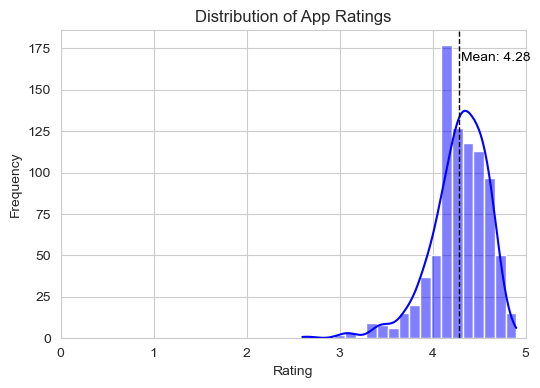

In [10]:
# Plot the rating distribution
plt.figure(figsize=(6, 4))
sns.histplot(play_store['Rating'], bins=20, kde=True, color='blue')

# Draw the mean line
mean_rating = play_store['Rating'].mean()
plt.axvline(mean_rating, color='black', linestyle='dashed', linewidth=1)
plt.text(mean_rating + 0.02, plt.ylim()[1] * 0.9, f'Mean: {mean_rating:.2f}', color='black')

# Add titles and labels
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(0, 5)

plt.show()

The distribution of app ratings was examined, revealing a strongly positively skewed pattern with positive kurtosis where most apps tend to have higher ratings, with a large number clustering around 4 to 5 stars and an average of 4.28. This suggests that users generally give positive feedback to apps, but there is still sufficient variation for meaningful analysis.
Furthermore, there is no data available for apps with very low ratings (i.e. less than 2.5). However, this is most likely due to a small sample size.

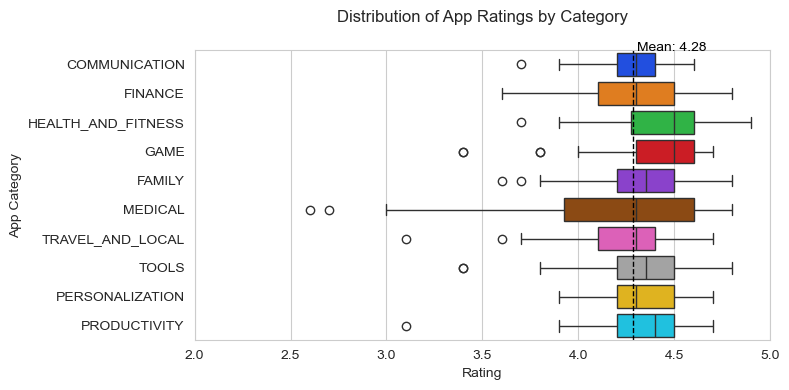

In [11]:
# Box Plot of App Ratings by Top 5 App Categories
plt.figure(figsize=(8, 4))
sns.boxplot(data=top_10_play_store, x='Rating', y='Category', palette='bright', hue='Category')

# Draw the average rating line
average_rating = play_store['Rating'].mean()
plt.axvline(average_rating, color='black', linestyle='dashed', linewidth=1)
plt.text(average_rating + 0.02, plt.ylim()[1] * 0.9, f'Mean: {average_rating:.2f}', color='black')

plt.title('Distribution of App Ratings by Category', pad=20)
plt.ylabel('App Category')
plt.xlabel('Rating')
plt.xlim(2, 5)
plt.tight_layout()
plt.show()


The boxplot illustrates the distribution of app ratings across different categories, with most categories showing a median rating around 4.0 to 4.5. Medical apps display the widest spread and include lower ratings, with notable outliers below 3.0.  In contrast, categories like Finance and Productivity show more compact distributions, indicating more consistent user ratings around the higher end of the scale. <br>
Overall, most the ratings of most categories are distributed around the mean with a few exceptions. For categories such as Game and Health and Fitness the data suggests that users give more postive ratings compared to the mean.

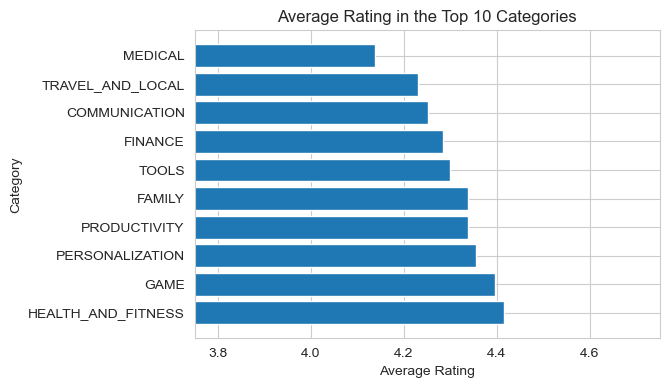

In [12]:
# Average Rating by Category
category_means = top_10_play_store.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
plt.barh(category_means.index, category_means)
plt.title('Average Rating in the Top 10 Categories')
plt.xlabel('Average Rating')
plt.xlim(3.75, 4.75)
plt.ylabel('Category')
plt.show()


This chart provides insights into the distribution of app ratings across different categories. It shows that medical apps tend to receive lower ratings on average, while game and health apps generally receive higher ratings. Most other categories cluster around the overall average rating, displaying less variation.

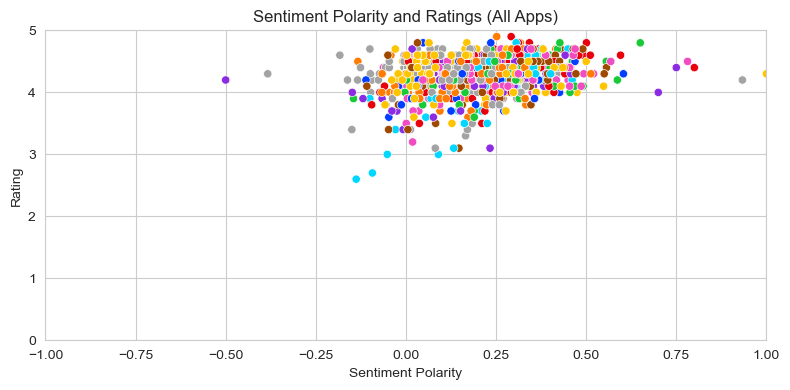

In [13]:
# Scatter Plot of Sentiment Polarity vs. App Ratings for All Apps
plt.figure(figsize=(8, 4))
sns.scatterplot(data=play_store, x='Avg_Sentiment_Polarity', y='Rating', hue='Category', palette='bright')
plt.title('Sentiment Polarity and Ratings (All Apps)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Rating')
plt.xlim(-1, 1)
plt.ylim(0, 5)
plt.legend().remove()

plt.tight_layout()
plt.show()



A preliminary analysis of the relationship between sentiment polarity and ratings indicated a positive trend: apps with higher sentiment polarity generally have higher average ratings. This observation supports the hypothesis that sentiment polarity is a key factor influencing app ratings.

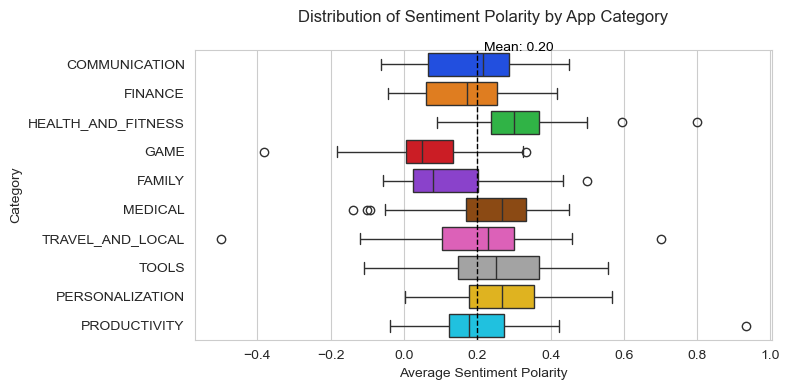

In [14]:
# Box Plot of Sentiment Polarity by App Category
plt.figure(figsize=(8, 4))
sns.boxplot(data=top_10_play_store, x='Avg_Sentiment_Polarity', y='Category', palette='bright', hue='Category')

# Draw the average sentiment polarity line
average_sentiment_polarity = play_store['Avg_Sentiment_Polarity'].mean()
plt.axvline(average_sentiment_polarity, color='black', linestyle='dashed', linewidth=1)
plt.text(average_sentiment_polarity + 0.02, plt.ylim()[1] * 0.9, f'Mean: {average_sentiment_polarity:.2f}', color='black')

# Add title with increased padding
plt.title('Distribution of Sentiment Polarity by App Category', pad=20)
plt.xlabel('Average Sentiment Polarity')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


The boxplot illustrates the distribution of average sentiment polarity across various app categories. The overall mean sentiment polarity is 0.20, with most categories displaying positive sentiment values. Categories like Health and Fitness and Finance have higher sentiment polarity, while Family and Productivity show more variability, with broader distributions around the mean. The Medical category exhibits several negative outliers, indicating that some apps in this category receive more critical sentiment. <br> The presence of outliers in several categories suggests variation in user sentiment within each category.

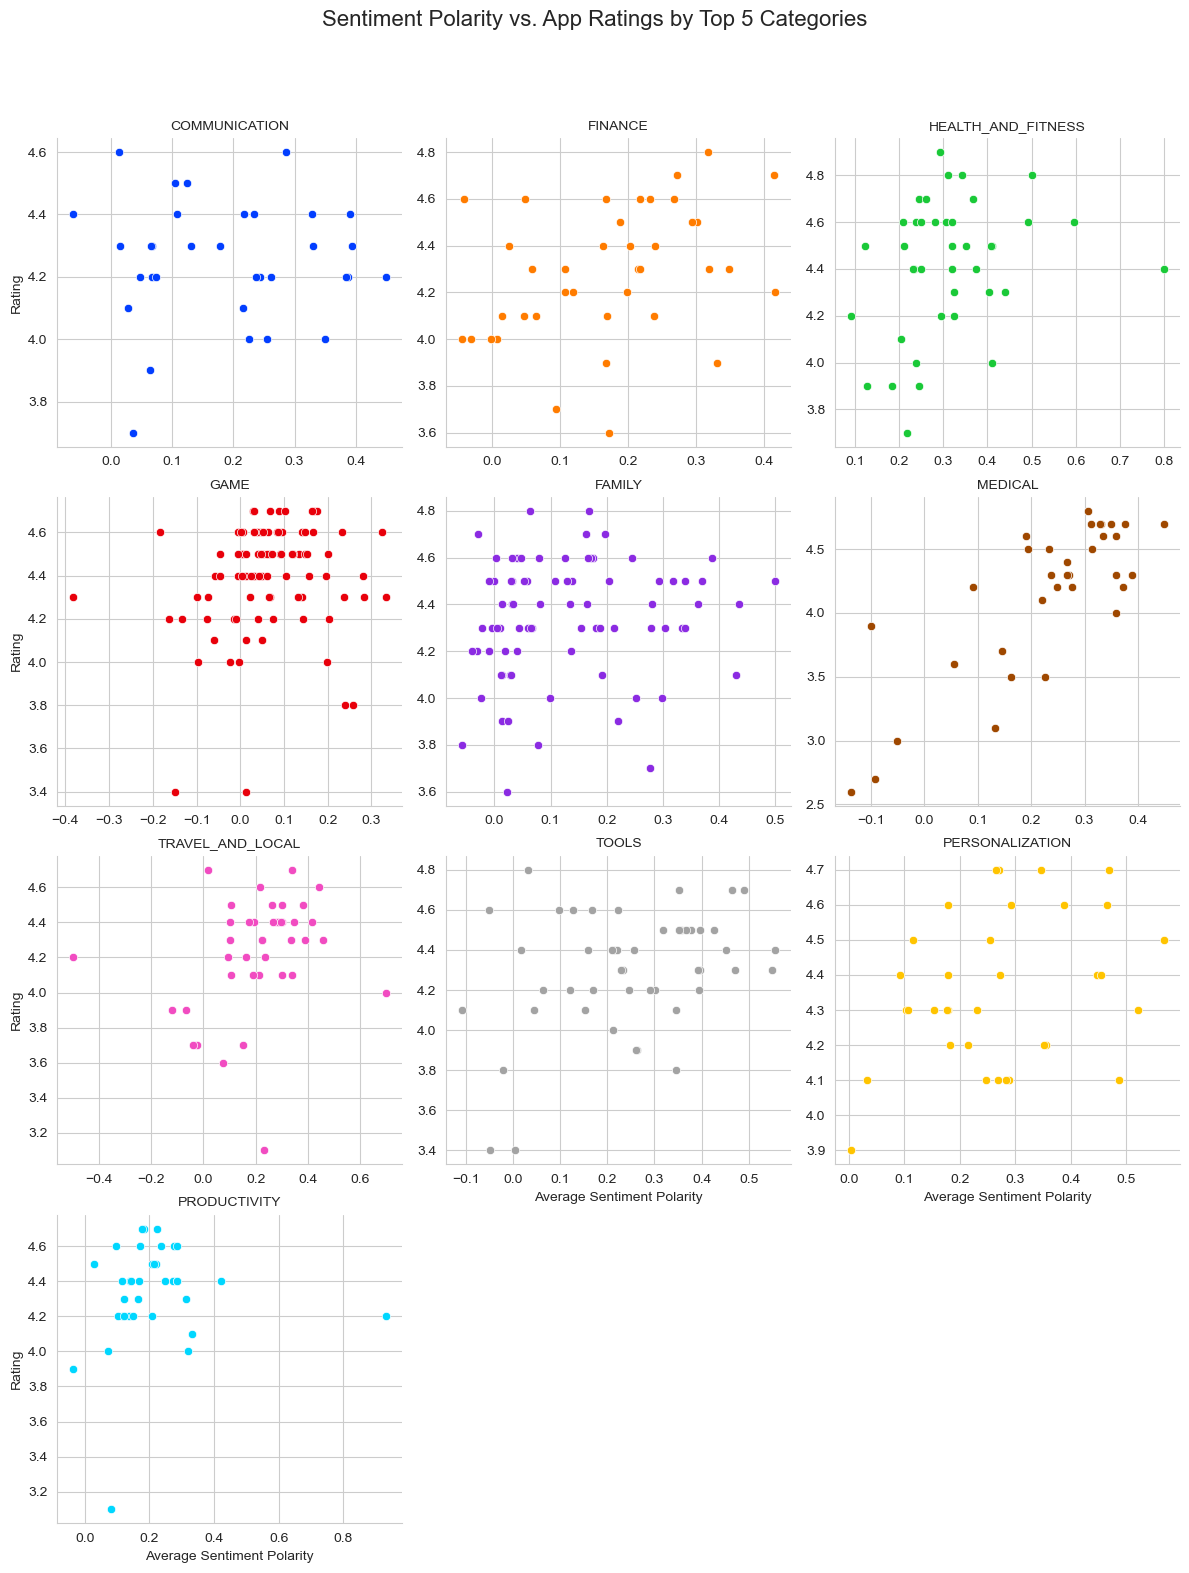

In [15]:

# Scatter Plot of Sentiment Polarity vs. App Ratings for Each of the Top 10 Categories
g = sns.FacetGrid(top_10_play_store, col='Category', col_wrap=3, height=4, sharex=False, sharey=False, palette='bright', hue='Category')
g.map(sns.scatterplot, 'Avg_Sentiment_Polarity', 'Rating')
g.set_titles('{col_name}')
g.set_axis_labels('Average Sentiment Polarity', 'Rating')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sentiment Polarity vs. App Ratings by Top 5 Categories', fontsize=16)
plt.show()

The scatter plots illustrate the relationship between average sentiment polarity and app ratings across the top app categories. While most categories exhibit a slight positive relationship between sentiment polarity and ratings, the strength of this relationship varies across categories. For instance, Health and Fitness and Medical apps show a stronger correlation between higher sentiment polarity and higher ratings, whereas Communication and Tools categories display a more scattered pattern, suggesting a weaker relationship. Game and Productivity apps tend to cluster around specific ranges of sentiment polarity, but their ratings still exhibit some variability. <br> Overall, these plots suggest that sentiment polarity influences app ratings to different extents depending on the category. 
This relationship will be further tested in the following section

In [16]:
# Select relevant columns
data = play_store[['Rating', 'Avg_Sentiment_Polarity']]

# Calculate summary statistics
summary_stats = data.describe().T[['count', 'mean', 'std', 'min', 'max']]

# Calculate correlations with other variables
correlations = data.corr()

# Merge summary statistics and correlation information
summary_table = summary_stats.join(correlations, lsuffix='_stat')

# Rename the columns for clarity
summary_table.columns = [
    'N', 
    'Mean', 
    'S.D.', 
    'Min', 
    'Max', 
    'Rating Correlation', 
    'Avg_Sentiment_Polarity Correlation'
]

# Print the summary table
summary_table = np.round(summary_table,2)
summary_table


,N,Mean,S.D.,Min,Max,Rating Correlation,Avg_Sentiment_Polarity Correlation
Rating,851.0,4.28,0.31,2.6,4.9,1.00,0.25
Avg_Sentiment_Polarity,851.0,0.20,0.16,-0.5,1.0,0.25,1.00



## 5 Hypotheses 
### 5.1 Hypothesis 1: Apps with higher average sentiment polarity have higher ratings than apps with low sentiment polarity
- **Null Hypothesis (H₀):** There is no significant difference in ratings between apps with high average sentiment polarity and apps with low sentiment polarity.
- **Alternative Hypothesis (H₁):** Apps with high sentiment polarity have significantly different ratings compared to apps with low sentiment polarity.



#### 5.1.1 Two Sample, One-sided T-Test
To test the first hypothesis, t tests will be used to assess whether sentiment polarity is a significant indicator of ratings. The exploratory data analysis  revealed that the distribution of app ratings is reasonably normal across both high and low sentiment polarity groups. If both groups are similarly distributed and have roughly equal variances, the t-test is ideal for determining if the difference in their means is statistically significant.

The t-test accounts for the variance within each group (high and low sentiment polarity) and adjusts for different group sizes, ensuring that the comparison remains robust.


In [17]:
# two sample, one-sided t-test for the hypotheses Rating of high Avg Sentiment Apps > Rating of low Avg Sentiment Apps 
# and Rating of high Avg Sentiment Apps < Rating of low Avg Sentiment Apps


# Take a sample from the data
sample = play_store.sample(n=80, random_state=25)


# 1. Identify both samples
# Define the 25th and 75th percentiles for Avg_Sentiment_Polarity
low_polarity_threshold = sample['Avg_Sentiment_Polarity'].quantile(0.25)
high_polarity_threshold = sample['Avg_Sentiment_Polarity'].quantile(0.75)

# Identify both samples based on the new thresholds
sample_high_polarity = sample[sample['Avg_Sentiment_Polarity'] > high_polarity_threshold]
sample_low_polarity = sample[sample['Avg_Sentiment_Polarity'] < low_polarity_threshold]


# Perform Levene's test for equal variances
stat, p_value = stats.levene(sample_high_polarity['Rating'], sample_low_polarity['Rating'])
print(f"Levene's test statistic: {stat:.4f}, p-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("The variances are significantly different (p < 0.05).")
else:
    print("The variances are not significantly different (p >= 0.05).\n")
# Since our Variances do not significantly differ, we can use a standard t-test

# 2. Compute the population and sample mean
population_mean_high_polarity = play_store[play_store['Avg_Sentiment_Polarity'] > play_store['Avg_Sentiment_Polarity'].mean()]['Rating'].mean()
population_mean_low_polarity = play_store[play_store['Avg_Sentiment_Polarity'] < play_store['Avg_Sentiment_Polarity'].mean()]['Rating'].mean()

sample_mean_high_polarity = sample_high_polarity['Rating'].mean()
sample_mean_low_polarity = sample_low_polarity['Rating'].mean()

# 3. Compute the one-sided t-test to check if the sample mean differs from the hypothesized mean.
t_statistic_1s_g, p_value_1s_g = stats.ttest_ind(sample_high_polarity.Rating, sample_low_polarity.Rating, alternative="greater") 
t_statistic_1s_l, p_value_1s_l = stats.ttest_ind(sample_high_polarity.Rating, sample_low_polarity.Rating, alternative="less") 

# 4. Print results
print(f"\nPopulation Mean Low Sentiment Polarity: {population_mean_low_polarity:.2f}")
print(f"Population Mean High Sentiment Polarity: {population_mean_high_polarity:.2f}")
print(f"Sample Mean Low Sentiment Polarity: {sample_mean_low_polarity:.2f}")
print(f"Sample Mean High Sentiment Polarity: {sample_mean_high_polarity:.2f}")

# One-sided greater
print("\nOne-Sided Test (High Sentiment Polarity Rating Mean > Low Sentiment Polarity Rating Mean):")
print(f"t-statistic greater: {t_statistic_1s_g:.2f}")
print(f"p-value greater: {p_value_1s_g:.4f}")

# One-sided less
print("\nOne-Sided Test (High Sentiment Polarity Rating Mean < Low Sentiment Polarity Rating Mean):")
print(f"t-statistic less: {t_statistic_1s_l:.2f}")
print(f"p-value less: {p_value_1s_l:.4f}")

Levene's test statistic: 0.4872, p-value: 0.4894
The variances are not significantly different (p >= 0.05).


Population Mean Low Sentiment Polarity: 4.22
Population Mean High Sentiment Polarity: 4.35
Sample Mean Low Sentiment Polarity: 4.14
Sample Mean High Sentiment Polarity: 4.35

One-Sided Test (High Sentiment Polarity Rating Mean > Low Sentiment Polarity Rating Mean):
t-statistic greater: 1.76
p-value greater: 0.0433

One-Sided Test (High Sentiment Polarity Rating Mean < Low Sentiment Polarity Rating Mean):
t-statistic less: 1.76
p-value less: 0.9567


#### 5.1.2 Interpretation of the Results
**First Test (High Sentiment Polarity Rating Mean > Low Sentiment Polarity Rating Mean):**<br>
Since the p-value is less than 0.05, we reject the null hypothesis for this one-sided test. This indicates that apps with higher sentiment polarity have significantly higher ratings than those with lower sentiment polarity.
Test (High Sentiment Polarity Rating Mean < Low Sentiment Polarity Rating Mean):

**Second Test (High Sentiment Polarity Rating Mean < Low Sentiment Polarity Rating Mean)**<br>
The p-value is much greater than 0.05, so we fail to reject the null hypothesis here. This confirms that high sentiment polarity apps do not have lower ratings than low sentiment polarity apps.

**Conclusion:**<br>
Based on the one-sided t-test, there is sufficient evidence to suggest that apps with higher sentiment polarity (i.e., more positive reviews) tend to have significantly higher ratings than those with lower sentiment polarity. 

**Sentiment Polarity and Ratings Correlation:**<br>
The fact that apps with higher sentiment polarity also have higher ratings suggests a positive correlation between the perceived sentiment of reviews and the app's rating. This is expected, as positive user sentiment is often aligned with higher satisfaction and thus higher ratings. The relationship could be explored further with a correlation analysis to quantify this association.

**Practical Significance:**<br>
While the t-test shows statistical significance (p-value = 0.0433 for the one-sided test), the difference in sample means (4.35 vs. 4.14) is relatively small. This suggests that while apps with higher sentiment polarity tend to have better ratings, the practical impact of this difference may not be substantial. A small difference like this might not have a large impact in real-world applications, especially if users expect high ratings (e.g., 4.0+) across most apps.

**Distribution of Ratings:**<br>
It might be useful to check the distribution of the ratings within each group (high and low sentiment polarity). If both groups have tightly clustered ratings (e.g., mostly between 4 and 5), this would reinforce the idea that small differences can still be significant. Alternatively, more variability might indicate that other factors besides sentiment are influencing ratings.

**Sentiment as a Predictor of Ratings:**<br>
Given that sentiment polarity appears to be related to app ratings, sentiment analysis of reviews could be a useful predictor for app success. Developers could monitor average sentiment polarity to estimate how their app might perform in terms of ratings, offering them an early signal of potential problems or successes.

**Exploring the Middle Ground:**<br>
Since the test focuses on the extremes (25th and 75th percentiles of sentiment polarity), it could be interesting to explore the middle 50% of the data. This group might not show as clear a relationship, but it could provide insights into how neutral or mixed sentiment affects app ratings.

**Effect of Other Factors:**<br>
The analysis isolates sentiment polarity as the key factor influencing ratings. However, other variables, such as app category or the total number of reviews, might also play a role. A regression analysis could help disentangle these effects and provide a more nuanced view of how different factors contribute to app ratings. Therefore this will be further examined in the following section.

### 5.2 Hypothesis 2: Higher Sentiment Polarity has stronger influence on the average Rating in some Categories 
- **Null Hypothesis (H₀):** The influence of sentiment polarity on ratings does not vary significantly across major app categories.
- **Alternative Hypothesis (H₁):**  The influence of sentiment polarity on ratings is significantly stronger in some major app categories compared to others.

#### 5.2.1 Linear Regression
To examine the second hypothesis a linear regression is employed, focusing on major app categories with sufficient data.

As observed in the exploratory data analysis, the continuous nature of both app ratings and sentiment polarity makes linear regression a good fit for modeling their relationship. The model also allows for interaction terms, capturing how sentiment polarity affects ratings differently across app categories like medical and health & fitness. Additionally, the regression framework can handle multiple predictors, explore potential non-linear effects that were observed, and explain a moderate portion of the variance in ratings. 


In [18]:
# Create dummie variables 
# drop_first=True avoids multicollinearity by removing one dummy variable (the baseline category).
play_store_top_10_dummies = pd.get_dummies(top_10_play_store, columns=['Category'], drop_first=True)
play_store_top_10_dummies.head()



,App,Rating,Avg_Sentiment_Polarity,Category_FAMILY,Category_FINANCE,Category_GAME,Category_HEALTH_AND_FITNESS,Category_MEDICAL,Category_PERSONALIZATION,Category_PRODUCTIVITY,Category_TOOLS,Category_TRAVEL_AND_LOCAL
61,Gmail,4.3,0.066304,False,False,False,False,False,False,False,False,False
62,Hangouts,4.0,0.225806,False,False,False,False,False,False,False,False,False
63,Firefox Browser fast & private,4.4,0.107240,False,False,False,False,False,False,False,False,False
64,Contacts,4.3,0.015515,False,False,False,False,False,False,False,False,False
65,Browser 4G,4.3,0.393632,False,False,False,False,False,False,False,False,False


The app category is a categorical variable. Therefore, we cannot add it to the model as it is. <br>
To estimate this model, we therefore need to convert this variable into a set of dummy variables.<br>
To avoid multicollinearity, we include all dummies with the exception of the reference category. 

In [19]:
# Updating the regression formula with the top 10 categories
# We will automatically detect all category columns from the one-hot encoded dataset
category_columns = [col for col in play_store_top_10_dummies.columns if col.startswith('Category_')]

# Build the formula dynamically to include all categories and interaction terms
main_effects = ' + '.join([f'{col}' for col in category_columns])
# interaction terms test whether the relationship between sentiment polarity and ratings changes depending on the app category.
interaction_terms = ' + '.join([f'Avg_Sentiment_Polarity:{col}' for col in category_columns])

# Create the Full formula
formula = f'Rating ~ Avg_Sentiment_Polarity + {main_effects} + {interaction_terms}'

# Fit the model
model = smf.ols(formula, data=play_store_top_10_dummies)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     8.641
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.88e-21
Time:                        11:43:56   Log-Likelihood:                -43.606
No. Observations:                 482   AIC:                             127.2
Df Residuals:                     462   BIC:                             210.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

##### Adjustments 
We can adjust the model to include the cubed term for Avg_Sentiment_Polarity to account for potential non-linear relationships between sentiment polarity and app ratings. Initial models indicated that a linear or quadratic relationship might not fully capture the effect of sentiment polarity on ratings. 
The addition of the cubed term allows the model to detect more complex patterns, such as diminishing returns or potential reversal of sentiment polarity's impact at extreme values. This helps provide a more accurate representation of how sentiment polarity influences ratings, particularly for different app categories.

In [20]:
# Add a cubed term for Sentiment Polarity to see if there is a non-linear relationship
play_store_top_10_dummies['Sentiment_Polarity_Cubed'] = play_store_top_10_dummies['Avg_Sentiment_Polarity'] ** 3

# Update the formula and add cubed term 
formula = f'Rating ~ Avg_Sentiment_Polarity + Sentiment_Polarity_Cubed + {main_effects} + {interaction_terms}'

# Fit the model with the cubed term
model = smf.ols(formula, data=play_store_top_10_dummies)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     9.133
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           3.15e-23
Time:                        11:43:56   Log-Likelihood:                -36.453
No. Observations:                 482   AIC:                             114.9
Df Residuals:                     461   BIC:                             202.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

####  Interpretation

This regression model investigates the relationship between **sentiment polarity**, **app categories**, and their interactions on app ratings, while controlling for potential non-linear effects using a **cubed term** for sentiment polarity. Although it did not significantly improve our model, we were able to make a slight improvement by using the cubed polarity.

##### Model Fit:
- **R-squared**: 0.284  
  The model explains **28.4%** of the variance in app ratings, indicating that the predictors, including sentiment polarity and app categories, capture a moderate portion of the variation in ratings.
  
- **Adjusted R-squared**: 0.253  
  The adjusted R-squared accounts for the number of predictors and suggests that the model is moderately successful in explaining the variability in ratings.

##### Significant Predictors:
- **Category MEDICAL**: The coefficient of **-0.8303** (p < 0.001) indicates that **medical apps** tend to have significantly lower ratings compared to the baseline category, even after accounting for sentiment polarity and other factors.

- **Sentiment Polarity × Category MEDICAL**: The interaction between sentiment polarity and medical apps is **strongly positive** (3.1334, p < 0.001), suggesting that **sentiment polarity has a stronger influence** on ratings in this category compared to others.

- **Sentiment Polarity × Category HEALTH AND FITNESS**: The positive interaction term (1.2811, p = 0.012) indicates that sentiment polarity has a **greater impact** on ratings in the health and fitness category.

- **Sentiment Polarity × Category PRODUCTIVITY**: This interaction is also significant (1.1741, p = 0.024), indicating that **higher sentiment polarity** is associated with better ratings in productivity apps.

#### Non-Significant Predictors:
- **Avg Sentiment Polarity** on its own is not significant (p = 0.459), suggesting that its effect on ratings varies significantly by category rather than having a uniform influence across all apps.

- Other interactions, such as **Sentiment Polarity × Category FAMILY** and **Sentiment Polarity × Category GAME**, are not significant, indicating that sentiment polarity does not have a differential impact on ratings in these categories.

#### Non-Linear Effect:
- **Cubed Term for Sentiment Polarity**: The significant negative coefficient (-1.6692, p < 0.001) indicates a **non-linear relationship** between sentiment polarity and ratings, where very high levels of polarity may lead to diminishing returns or even negative effects on ratings.

#### Conclusion:
The model shows that **sentiment polarity interacts significantly with certain app categories**, particularly **medical**, **health & fitness**, and **productivity** apps, where higher sentiment polarity leads to better ratings. The non-linear relationship between sentiment polarity and ratings suggests that the effect of extreme sentiment (positive or negative) is not always linear, and very high sentiment polarity may lead to declining ratings in some cases. Overall, the model provides valuable insights into how sentiment polarity affects app ratings, particularly in specific categories.


#### 5.2.3 Making Predictions

In [21]:
# making predictions
pred_insample = results.predict() # or results.fittedvalues


# add predictions to the data frame
play_store_top_10_dummies['predictions'] = results.predict()
play_store_top_10_dummies['residuals'] = results.resid # computing residuals (i.e., actual - predicted values)

#### 5.2.4 Checking Model Assumptions
##### Linearity

Text(0.5, 1.0, 'Actual vs. Predicted')

<Figure size 700x400 with 0 Axes>

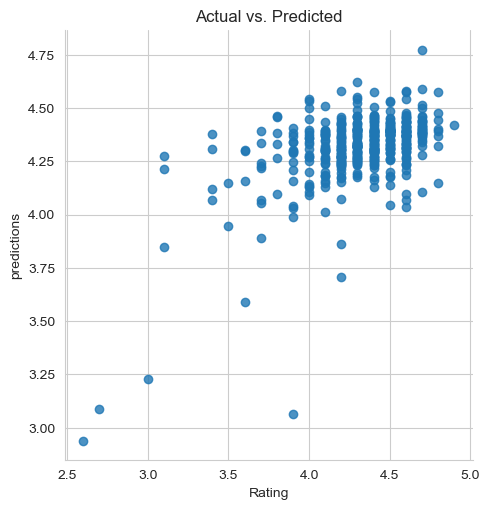

In [22]:
# Plotting the actual vs predicted values
plt.figure(figsize=(7, 4))
sns.lmplot(x='Rating', y='predictions', data=play_store_top_10_dummies, fit_reg=False)        
plt.title('Actual vs. Predicted')

##### Interpretation:

The **Actual vs. Predicted** graph shows that the model’s predictions are clustered around **4.0 to 4.5**, which aligns with the distribution of app ratings in our data, where most values are within this range. Thus, this pattern is **expected**. 

However, the model tends to **underpredict** for apps with higher ratings (closer to 5.0) and **overpredict** for apps with lower ratings (around 3.0). This suggests that while the model performs well for the bulk of apps, it struggles to capture the extremes (very high or low ratings).
To find out whether the model could also predict ratings outside this range a larger data set with a higher distribution of ratings would be required.  

Addtitionally, the predicted ratings do not seem to track the actual values well. There is no clear alignment along a 45-degree line, which suggests systematic errors in the model.
The model might not be capturing certain nuances or important features that affect the app ratings, leading to similar predictions across a range of actual ratings.

**Key Points:**<br>
- The clustering around 4.0–4.5 is **normal** given the skewed distribution of ratings.
- There are some **systematic errors** at the extremes (underprediction for high ratings, overprediction for low ratings).
- Further refinement or more data could improve the model's handling of these outliers, but overall the pattern aligns with expected behavior.



##### Homoscedasticity

To assess whether our error terms (residuals) have similar variance, we can plot the residuals vs. the predicted and observed values and see if there are odd patters. 

In the case of homscedasticity, the residuals would vary equally for all predicted and actual values, i.e., they should follow a line. 

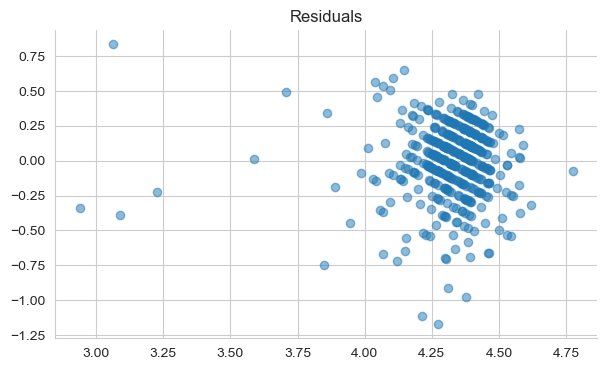

In [23]:
# Plotting the residuals
plt.figure(figsize=(7, 4))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=play_store_top_10_dummies.predictions, y=play_store_top_10_dummies.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

##### Interpretation

The residuals plot shows how the residuals (the differences between actual and predicted values) are distributed across predicted values. Here's a short interpretation:

- **Fan-Shaped Pattern:** <br>
    The residuals appear to fan out as the predicted values move away from 4.25, especially below 4.0 and above 4.5. This suggests heteroscedasticity, meaning that the model’s prediction errors are not constant across all predicted values. Specifically, the variability in the residuals increases as the predicted values deviate from the central cluster around 4.25.

- **Clustered Residuals:** <br>
    There is also a clustering of residuals around zero for the predicted values between 4.0 and 4.5, indicating that the model fits better in this range but struggles outside of it.

**Conclusion:**<br>
The presence of a fan-shaped pattern suggests the potential violation of homoscedasticity. 
The residuals are not uniformly distributed, which means the model's error variance may not be constant across all predicted values. 

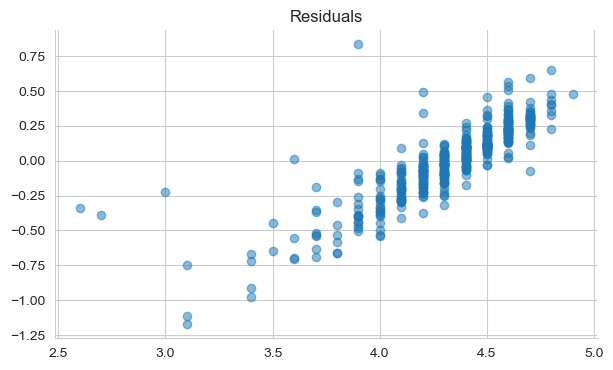

In [24]:
# Plotting the residuals
plt.figure(figsize=(7, 4))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=play_store_top_10_dummies.Rating, y=play_store_top_10_dummies.residuals, alpha=0.5)
ax.spines['right'].set_visible(False)  
ax.spines['top'].set_visible(False)  
plt.title('Residuals')
plt.show()

##### Interpretation:

The residuals plot shows the difference between the actual and predicted ratings across the range of actual ratings (x-axis).

- **Pattern in Residuals**: <br>
    There is a **clear pattern** in the residuals, with a **positive slope** indicating that the model systematically **underpredicts ratings** for higher-rated apps and **overpredicts** for lower-rated apps. This is evident from the increasing residual values as the actual ratings increase.

- **Violation of Assumptions**: <br>
    The presence of this pattern suggests a **violation of the assumption of homoscedasticity**, where the residuals should ideally be randomly scattered around zero without any clear trend. This pattern implies that the model might not be appropriately capturing the relationship between the predictors and the ratings.

As a violation fo the assumption of homoscedasticity was already observed in the previous chart. To account for this, we will use **Robust Standard Errors** in the following section.



##### Heteroscedasticity Robust Standard Errors

In [25]:
# Fit the linear regression model
model = smf.ols(formula, data=play_store_top_10_dummies)
results = model.fit(cov_type = "HC3")

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     4.170
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           8.12e-09
Time:                        11:43:57   Log-Likelihood:                -36.453
No. Observations:                 482   AIC:                             114.9
Df Residuals:                     461   BIC:                             202.6
Df Model:                          20                                         
Covariance Type:                  HC3                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------

##### Interpretation
- **Improved Reliability**:<br> 
    The main improvement with robust standard errors is that they provide more reliable significance tests in the presence of heteroscedasticity, which was suggested by our residual plots. Therefore, even though the R-squared and coefficients remain the same, the p-values from the robust model are more trustworthy.

- **Potential Trade-offs**: <br>
    Some terms that were close to significance in the original model may now have slightly larger p-values due to more conservative error estimates. However, this is expected when dealing with robust standard errors, as they correct for heteroscedasticity and provide a more accurate reflection of significance.

**Conclusion**<br>
Statistical Fit (R-squared) remains the same between the models, so the predictive power of the model hasn't improved.
The use of robust standard errors improves the reliability of the significance tests, which is crucial when dealing with potential heteroscedasticity. This provides greater confidence in the results, particularly for significant interaction terms like medical and health & fitness categories. <br>

In summary, while the model fit has not improved, the robust model offers better statistical reliability, making it a preferable choice if we want to avoid heteroscedasticity. 

##### Normality of Residuals
A Q-Q plot helps to see if residuals are normally distributed. Points should follow the straight line.

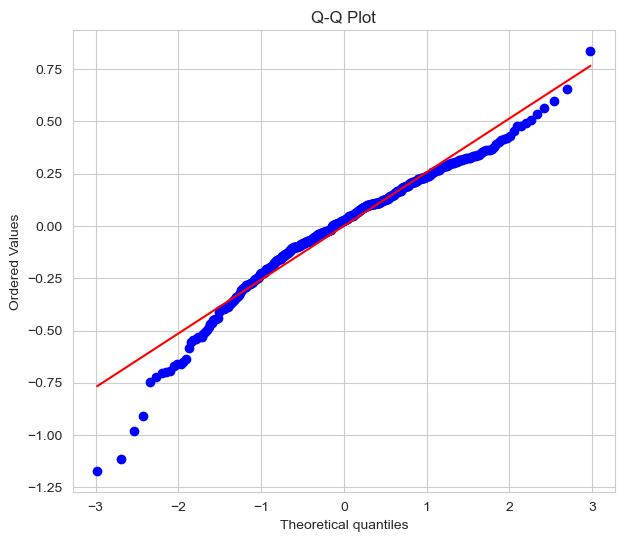

In [26]:
# Q-Q plot for normality
plt.figure(figsize=(7,6))
stats.probplot(play_store_top_10_dummies['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

##### Interpretation
- **Close Alignment in the Middle**:<br>
The points align well with the red line (which represents the theoretical normal distribution) in the middle of the distribution. This suggests that the residuals follow a normal distribution relatively well for moderate values.

- **Deviations at the Extremes**:<br>
The points deviate from the line at the lower left (negative residuals) and upper right (positive residuals) ends, indicating fat tails. This suggests that the residuals are not perfectly normal and may have heavier tails than a normal distribution, implying that extreme residuals are more frequent than expected under normality.

**Conclusion**:

The residuals generally follow a normal distribution for most values, but there are deviations at the extremes, suggesting non-normality in the tails. These deviations may imply the presence of outliers or non-normal error terms, which might warrant further investigation or adjustments to the model (e.g., transformations or robust modeling techniques).

##### Multicollinearity
We need to test if some variables are linear combinations of other variables. To do so, we compute the variance inflation factor (VIF). 

The VIF is a measure of multicollinearity in a regression model, where values above 10 are often considered to indicate a high degree of multicollinearity, suggesting that the predictor may be highly correlated with other predictors.


In [27]:
# Create a dataframe of independent variables
X = results.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results.model.exog_names

print(vif)

    VIF Factor                                           features
0    42.988711                                          Intercept
1     7.677025                            Category_FAMILY[T.True]
2     5.829268                           Category_FINANCE[T.True]
3     7.733122                              Category_GAME[T.True]
4    11.021667                Category_HEALTH_AND_FITNESS[T.True]
5     5.976324                           Category_MEDICAL[T.True]
6     7.297657                   Category_PERSONALIZATION[T.True]
7     6.793634                      Category_PRODUCTIVITY[T.True]
8     6.798437                             Category_TOOLS[T.True]
9     5.456395                  Category_TRAVEL_AND_LOCAL[T.True]
10   21.148447                             Avg_Sentiment_Polarity
11    5.979501     Avg_Sentiment_Polarity:Category_FAMILY[T.True]
12    5.408875    Avg_Sentiment_Polarity:Category_FINANCE[T.True]
13    3.661392       Avg_Sentiment_Polarity:Category_GAME[T.True]
14   15.50

##### Interpretation

The **Variance Inflation Factor (VIF)** is a measure of **multicollinearity** in a regression model, where values above **10** are often considered to indicate a high degree of multicollinearity, suggesting that the predictor may be highly correlated with other predictors.

**Key Findings**:
1. **Intercept**: <br>
    The VIF for the **Intercept** is **42.99**, which is unusually high. However, high VIFs for intercepts are common and not concerning for multicollinearity in the model’s explanatory variables.

2. **Avg_Sentiment_Polarity**: <br>
    The VIF for **Avg_Sentiment Polarity** is **21.15**, indicating **strong multicollinearity**. This suggests that **Avg_Sentiment Polarity** is highly correlated with other variables in the model, likely due to its interactions with multiple categories.

3. **Category Variables**: 
   - Most category-related variables have **moderate VIF values** between 5 and 10, indicating **some degree of multicollinearity**, but generally acceptable in scientific research.
   - The variable **Category_HEALTH_AND_FITNESS** has a higher VIF of **11.02**, suggesting potential multicollinearity concerns with other predictors.

4. **Interaction Terms**:
   - Some interaction terms exhibit **high VIF values**, such as:
     - **Avg_Sentiment_Polarity × Category_HEALTH_AND_FITNESS** with a VIF of **15.50**, indicating **significant multicollinearity**.
     - **Avg_Sentiment_Polarity × Category_PERSONALIZATION** and **Avg_Sentiment_Polarity × Category_TOOLS** both have VIF values above **9**, which indicates potential multicollinearity issues.

**Conclusion**:
- The **high VIF values** (particularly for **Avg_Sentiment_Polarity** and its interactions) suggest that multicollinearity is present, especially in the interaction terms. This may inflate standard errors, making it difficult to assess the true significance of some predictors.




##### Independence of Errors (autocorrelation of errors)

In [28]:
# Perform the Durbin-Watson test
dw_test = durbin_watson(play_store_top_10_dummies['residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 1.9056382445589166


**Interpretation**

With a Durbin-Watson value of 1.906, we can conclude that there is no significant evidence of autocorrelation in the residuals, meaning that the assumption of independent errors is likely satisfied in our regression model. No further corrective measures related to autocorrelation are needed at this stage.



## 6 Conclusion
 
This project aimed to explore how sentiment polarity influences app ratings in the Google Play Store and whether this effect varies across different app categories. The research was guided by two key hypotheses: (1) apps with higher sentiment polarity have better ratings, and (2) sentiment polarity has a stronger influence on ratings in certain app categories.

**Hypothesis 1**: The one-sided t-test confirmed that apps with higher sentiment polarity tend to have significantly higher ratings compared to those with lower sentiment polarity. The result was statistically significant (p-value < 0.05), supporting the hypothesis. However, while the statistical test revealed a difference in ratings, the practical difference between the groups was relatively small (average ratings of 4.35 vs. 4.14). This suggests that while positive sentiment leads to better ratings, the real-world impact of this difference may be modest. Most apps tend to cluster around high ratings (4.0 and above), making small differences less impactful in practical settings.

**Hypothesis 2**: The linear regression analysis revealed that sentiment polarity's influence on app ratings is not uniform across all categories. In particular, the results showed that sentiment polarity has a stronger impact on app ratings in certain categories, such as medical, health & fitness, and productivity apps. This finding is significant because it highlights the context-dependent nature of user feedback. For instance, users of medical apps may place a higher weight on reviews with positive sentiment, leading to a stronger correlation between sentiment polarity and ratings. The regression analysis also identified interaction terms between sentiment polarity and specific app categories, showing how sentiment's effect varies by category. However, non-significant interactions in some categories, like family and games, indicate that sentiment polarity does not always have a differential impact across all app types. Additionally, the model included a cubed term for sentiment polarity, accounting for non-linear effects. This revealed that while higher sentiment polarity generally leads to better ratings, extreme levels of polarity (either very positive or very negative) may result in diminishing returns or even negative impacts on ratings. This suggests that sentiment’s influence on ratings is not purely linear and highlights the importance of considering non-linear effects in similar analyses.


### 6.1 Limitations

One of the key limitations of the regression model was multicollinearity, particularly in the interaction terms between sentiment polarity and app categories. High Variance Inflation Factors (VIF) values for some variables (e.g., sentiment polarity interactions with medical and health & fitness categories) suggest that there were strong correlations among predictors, which can inflate standard errors and make it difficult to determine the true significance of individual predictors. Multicollinearity can reduce the reliability of the regression coefficients, meaning that while the model detected significant relationships, it might have been difficult to assess their precise magnitude or importance.

The R-squared value of 0.284 indicates that while the model explains some variance in app ratings, a large portion remains unexplained. This suggests that other factors, not captured by sentiment polarity and app categories, likely contribute to app ratings. For instance, variables like app quality, number of downloads, user engagement metrics, or the frequency of app updates could provide additional explanatory power and better account for the variability in app ratings.

While the inclusion of a cubed term for sentiment polarity slightly helped account for non-linear effects, further exploration of these relationships is warranted. The model showed that extremely high or low sentiment polarity may lead to diminishing returns or even negative impacts on ratings, indicating that sentiment polarity alone does not fully explain app success. Other non-linear modeling approaches could potentially offer a more nuanced understanding of how sentiment polarity affects app ratings.

The analysis focused solely on Google Play Store apps, meaning that the findings may not necessarily generalize to other app platforms (e.g., Apple App Store) or to products outside of the app ecosystem. Different platforms may have varying user behaviors, review systems, or market dynamics, which could influence how sentiment polarity relates to product ratings. Therefore, further research could explore how sentiment polarity influences ratings on other platforms or in different contexts, broadening the applicability of the findings.

Lastly, our research was limited by the amount of available data. From an initial 10841 Apps, only 851 remained after cleaning the data set. Further splitting up these apps into categories resulted in some of them only having approximately 30 data points. While it is possible to identify trends in such small data sets, they are far from reliable and could even be missleading if the sample is biased.   

### 6.2 Suggestions for Improvement

To address multicollinearity, future analyses could benefit from techniques like ridge regression or lasso regression. These methods help to reduce the effects of multicollinearity by either shrinking coefficients (in the case of ridge/lasso). This would improve the model’s reliability and provide more precise estimates of how sentiment polarity and app categories affect ratings.

The current model focused on sentiment polarity and app categories, but other variables could help explain more of the variance in app ratings. For example, variables related to app quality (e.g., performance metrics, stability, or user retention), the frequency of updates, or user engagement (e.g., active installs, session time) could be included in future models. This would allow for a more comprehensive analysis and potentially improve the model’s explanatory power.

To conclude, this study provided valuable insights into how sentiment polarity influences app ratings, showing that while sentiment polarity generally leads to better ratings, the strength of this effect varies across app categories. The findings emphasize the importance of context in understanding user feedback and suggest that sentiment polarity's impact is not purely linear. While the analysis identified significant relationships, it also highlighted the need for further exploration, particularly in addressing multicollinearity, expanding variables, and refining the approach to non-linear effects. These improvements would allow for a more robust and comprehensive understanding of how user sentiment influences app success in the digital marketplace.

However, the implications of this analysis are limited by the small amount of useable data. In order to further investigate the identified trends and correlations in the app store, much larger data sets would be required. This would enable our research to strengthen or reject our claims, identify further trends and create more precise models. 

